#                            Student grades prediction

Problem statement:
The dataset contains grades scored by students throughout their university tenure
in various courses and their CGPA calculated based on their grades.we have to Predict the CGPA of a student
based on different grades in four years.

    

In [1]:
#importing all  necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the  dataset
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


There are 571 rows and 43 columns are there. Each columns have corresponding grades obtained by students.From this,we have to predict the CGPA 

In [3]:
#to determine the shape of the dataset
df.shape

(571, 43)

In [4]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
#to check null values present or not
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Here there are null values present in the corresponding dataset.we have to replace those missing values by mean,mode or median methods

In [6]:
#drop the column hvaing null values 85 which is more
df.drop(columns="CS-412",axis=1,inplace=True)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C,C-,C-,C-,C-,A-,A,C-,B,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,D+,D,C,D,A-,B-,C,C,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,B,B,A,C,A,A,A,A-,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C-,D+,C,D+,C-,B-,B,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,B+,A-,A-,A,A,A,B+,B+,B,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A-,B+,B+,A,A,A-,B,A-,C,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B+,A-,B,A,B+,A,C,B+,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B+,D,B,B,C-,D,C,B,B-,2.193


In [7]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C,C-,C-,C-,C-,A-,A,C-,B,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,D+,D,C,D,A-,B-,C,C,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,B,B,A,C,A,A,A,A-,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,C-,D+,C,D+,C-,B-,B,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,B+,A-,A-,A,A,A,B+,B+,B,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A-,B+,B+,A,A,A-,B,A-,C,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B+,A-,B,A,B+,A,C,B+,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B+,D,B,B,C-,D,C,B,B-,2.193


In [8]:
#TO FIND THE COLUMNS
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CGPA'],
      dtype='object')

In [9]:
#To check the null values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CGPA          0
dtype: int64

In [10]:
#fill null values using mode method
df['CS-423'].mode()[0]

'A-'

In [11]:
df['CS-423'].fillna(df['CS-423'].mode()[0],inplace=True)

In [12]:
df['CS-423'].isnull().sum()

0

In [13]:
df['CS-419'].fillna(df['CS-419']).mode()
df['CS-419'].fillna(df['CS-419'].mode()[0],inplace=True)

df['CS-414'].fillna(df['CS-414']).mode()
df['CS-414'].fillna(df['CS-414'].mode()[0],inplace=True)

df['CS-421'].fillna(df['CS-421']).mode()
df['CS-421'].fillna(df['CS-421'].mode()[0],inplace=True)

df['CS-403'].fillna(df['CS-403']).mode()
df['CS-403'].fillna(df['CS-403'].mode()[0],inplace=True)

df['CS-317'].fillna(df['CS-317']).mode()
df['CS-317'].fillna(df['CS-317'].mode()[0],inplace=True)

df['CS-312'].fillna(df['CS-312']).mode()
df['CS-312'].fillna(df['CS-312'].mode()[0],inplace=True)

df['CS-306'].fillna(df['CS-306']).mode()
df['CS-306'].fillna(df['CS-306'].mode()[0],inplace=True)

df['CS-318'].fillna(df['CS-318']).mode()
df['CS-318'].fillna(df['CS-318'].mode()[0],inplace=True)

df['CS-403'].fillna(df['CS-403']).mode()
df['CS-403'].fillna(df['CS-403'].mode()[0],inplace=True)

df['CS-302'].fillna(df['CS-302']).mode()
df['CS-302'].fillna(df['CS-302'].mode()[0],inplace=True)

df['CS-301'].fillna(df['CS-301']).mode()
df['CS-301'].fillna(df['CS-301'].mode()[0],inplace=True)

df['CS-215'].fillna(df['CS-215']).mode()
df['CS-215'].fillna(df['CS-215'].mode()[0],inplace=True)

df['CS-212'].fillna(df['CS-212']).mode()
df['CS-212'].fillna(df['CS-212'].mode()[0],inplace=True)

df['CS-106'].fillna(df['CS-106']).mode()
df['CS-106'].fillna(df['CS-106'].mode()[0],inplace=True)

df['TC-383'].fillna(df['TC-383']).mode()
df['TC-383'].fillna(df['TC-383'].mode()[0],inplace=True)

df['MT-442'].fillna(df['MT-442']).mode()
df['MT-442'].fillna(df['MT-442'].mode()[0],inplace=True)

df['EL-332'].fillna(df['EL-332']).mode()
df['EL-332'].fillna(df['EL-332'].mode()[0],inplace=True)


df['MT-331'].fillna(df['MT-331']).mode()
df['MT-331'].fillna(df['MT-331'].mode()[0],inplace=True)

df['EF-303'].fillna(df['EF-303']).mode()
df['EF-303'].fillna(df['EF-303'].mode()[0],inplace=True)


df['HS-304'].fillna(df['HS-304']).mode()
df['HS-304'].fillna(df['HS-304'].mode()[0],inplace=True)


df['EL-102'].fillna(df['EL-102']).mode()
df['EL-102'].fillna(df['EL-102'].mode()[0],inplace=True)


df['EE-119'].fillna(df['EE-119']).mode()
df['EE-119'].fillna(df['EE-119'].mode()[0],inplace=True)


df['ME-107'].fillna(df['ME-107']).mode()
df['ME-107'].fillna(df['ME-107'].mode()[0],inplace=True)



df['CS-107'].fillna(df['CS-107']).mode()
df['CS-107'].fillna(df['CS-107'].mode()[0],inplace=True)


df['HS-205/20'].fillna(df['HS-205/20']).mode()
df['HS-205/20'].fillna(df['HS-205/20'].mode()[0],inplace=True)

df['MT-222'].fillna(df['MT-222']).mode()
df['MT-222'].fillna(df['MT-222'].mode()[0],inplace=True)


      
df['CS-203'].fillna(df['CS-203']).mode()
df['CS-203'].fillna(df['CS-203'].mode()[0],inplace=True)


df['CS-211'].fillna(df['CS-211']).mode()
df['CS-211'].fillna(df['CS-211'].mode()[0],inplace=True)



df['CS-210'].fillna(df['CS-210']).mode()
df['CS-210'].fillna(df['CS-210'].mode()[0],inplace=True)


df['MT-224'].fillna(df['MT-224']).mode()
df['MT-224'].fillna(df['MT-224'].mode()[0],inplace=True)

df['EE-222'].fillna(df['EE-222']).mode()
df['EE-222'].fillna(df['EE-222'].mode()[0],inplace=True)


    


     
df['CS-214'].fillna(df['CS-214']).mode()
df['CS-214'].fillna(df['CS-214'].mode()[0],inplace=True)

df['EE-217'].fillna(df['EE-217']).mode()
df['EE-217'].fillna(df['EE-217'].mode()[0],inplace=True)


       
df['CY-105'].fillna(df['CY-105']).mode()
df['CY-105'].fillna(df['CY-105'].mode()[0],inplace=True)


    


     
df['HS-105/12'].fillna(df['HS-105/12']).mode()
df['HS-105/12'].fillna(df['HS-105/12'].mode()[0],inplace=True)

df['MT-111'].fillna(df['MT-111']).mode()
df['MT-111'].fillna(df['MT-111'].mode()[0],inplace=True)   
        
   

In [14]:
#drop the column having null values 79
df.drop(columns='CS-406',axis=1,inplace=True)

In [15]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C,C-,C-,C-,C-,A,C-,B,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,A-,D,D+,D,C,D,B-,C,C,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,A-,B,B,A,C,A,A,A-,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,B+,C-,D+,C,D+,C-,B,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,A-,B-,B+,B+,B-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A,B+,A-,A-,A,A,B+,B+,B,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A+,A-,B+,B+,A,A,B,A-,C,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,C+,B+,A-,B,A,B+,C,B+,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B-,B+,D,B,B,C-,C,B,B-,2.193


In [16]:
df['CS-423'].isnull().sum()

0

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CGPA,571.0,2.954888,0.620552,0.8,2.538,3.029,3.451,3.985


In [18]:
df['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

Lets analyse via countplot

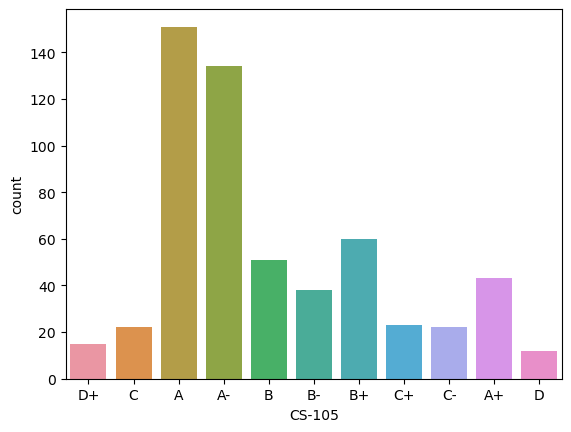

In [19]:
sns.countplot(x ='CS-105', data = df)
plt.show()

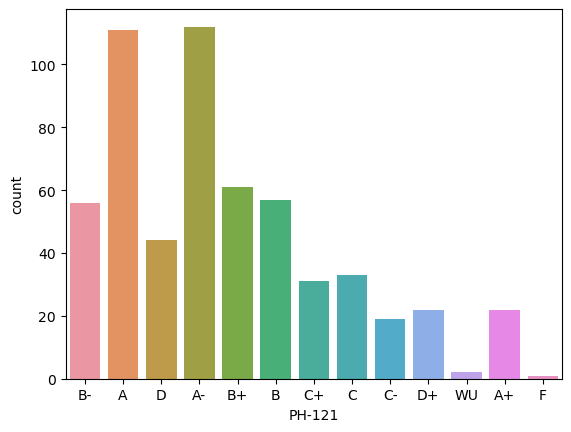

In [20]:
sns.countplot(x ='PH-121',data = df)
plt.show()

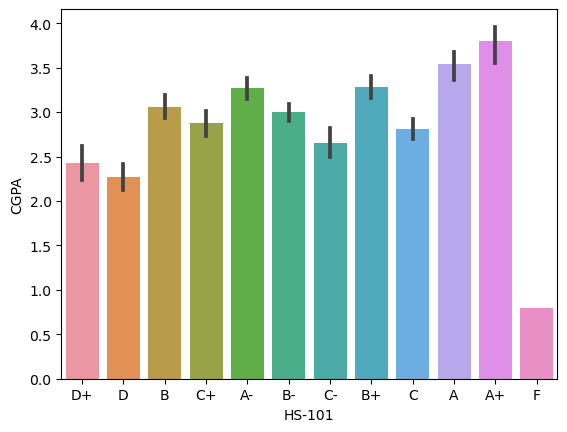

In [21]:
sns.barplot(x ='HS-101',y='CGPA',data = df)
plt.show()

In [22]:
df['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

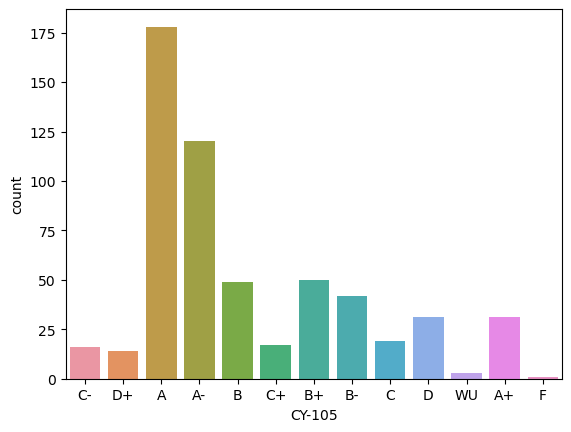

In [23]:
sns.countplot(x ='CY-105',data = df)
plt.show()

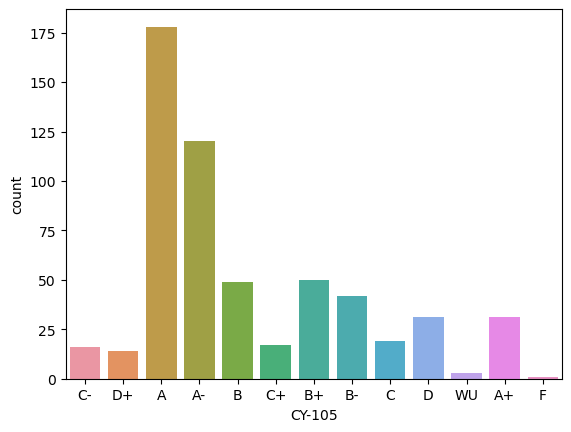

In [24]:
sns.countplot(x ='CY-105',data = df)
plt.show()                                                               

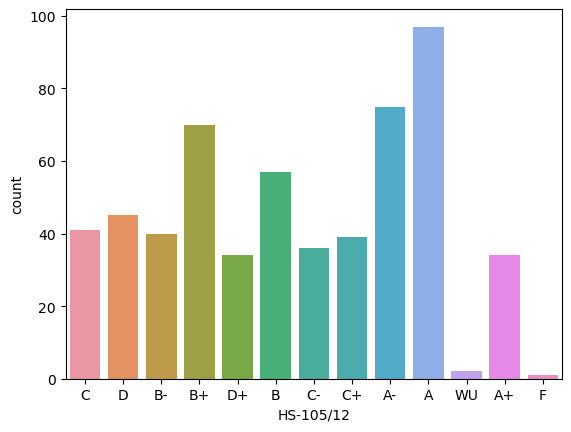

In [25]:
sns.countplot(x ='HS-105/12',data = df)
plt.show()                                                               

Here,for HS-105/12 subject,failures are less, also students having A grade is more. 

In [26]:
feature =['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421','CS-414', 'CS-419', 'CS-423',
       'CGPA']

Enumerating the feature for further analysis


In [27]:
list(enumerate(feature))

[(0, 'PH-121'),
 (1, 'HS-101'),
 (2, 'CY-105'),
 (3, 'HS-105/12'),
 (4, 'MT-111'),
 (5, 'CS-105'),
 (6, 'CS-106'),
 (7, 'EL-102'),
 (8, 'EE-119'),
 (9, 'ME-107'),
 (10, 'CS-107'),
 (11, 'HS-205/20'),
 (12, 'MT-222'),
 (13, 'EE-222'),
 (14, 'MT-224'),
 (15, 'CS-210'),
 (16, 'CS-211'),
 (17, 'CS-203'),
 (18, 'CS-214'),
 (19, 'EE-217'),
 (20, 'CS-212'),
 (21, 'CS-215'),
 (22, 'MT-331'),
 (23, 'EF-303'),
 (24, 'HS-304'),
 (25, 'CS-301'),
 (26, 'CS-302'),
 (27, 'TC-383'),
 (28, 'MT-442'),
 (29, 'EL-332'),
 (30, 'CS-318'),
 (31, 'CS-306'),
 (32, 'CS-312'),
 (33, 'CS-317'),
 (34, 'CS-403'),
 (35, 'CS-421'),
 (36, 'CS-414'),
 (37, 'CS-419'),
 (38, 'CS-423'),
 (39, 'CGPA')]

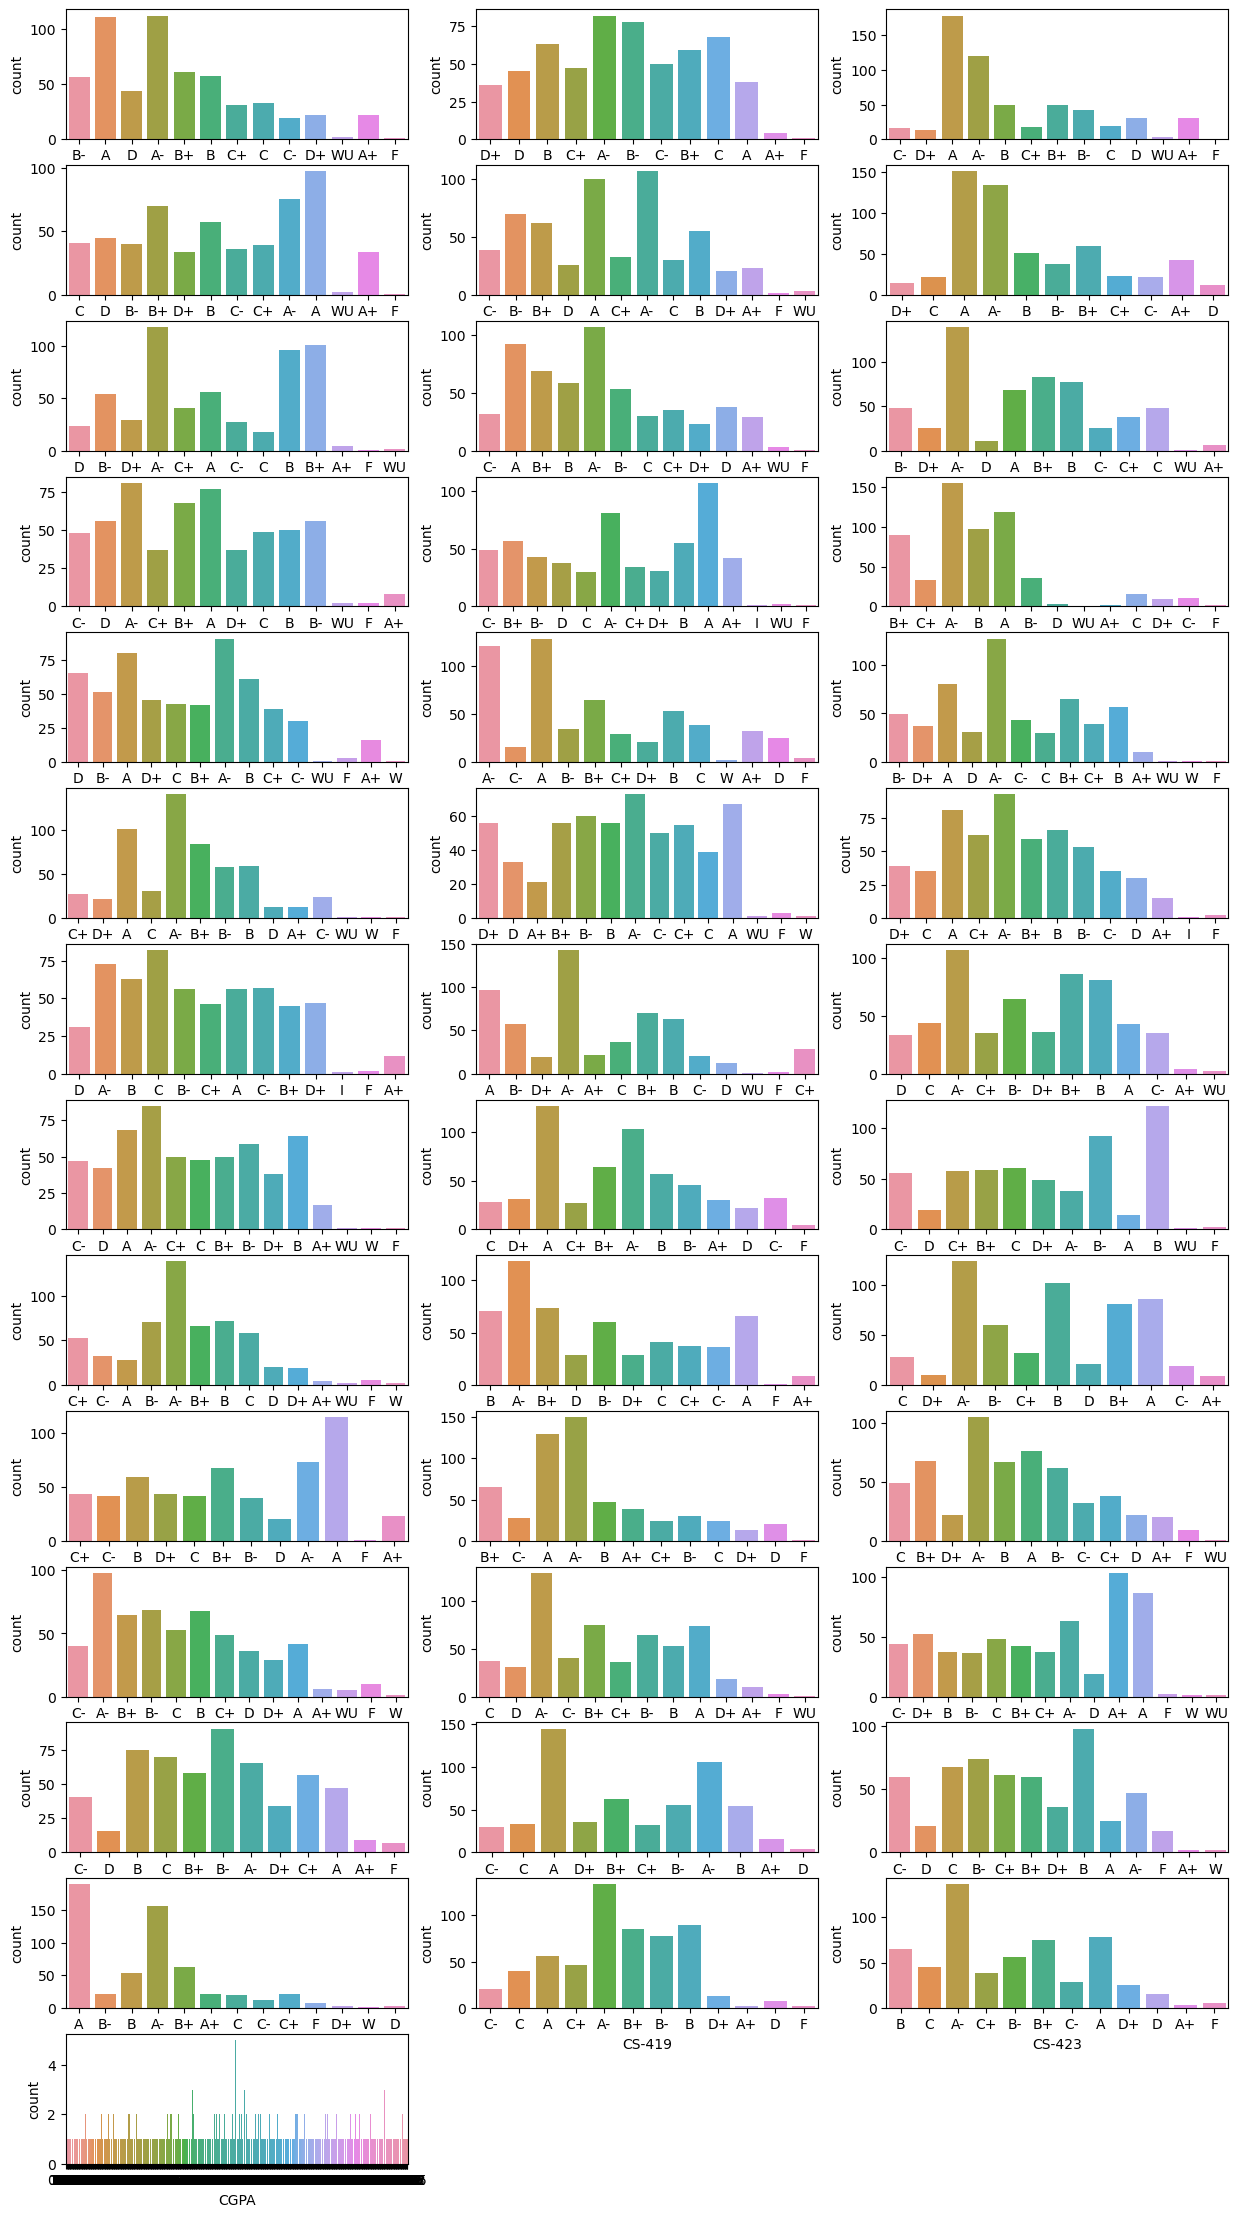

In [28]:
#plot via countplot
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(15,3,i[0]+1)
    sns.countplot(i[1],data=df)   

By analysing all those graphs rate of failure students are less compared to others

In [30]:
#DO label encoding to convert categorical into numerical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())):
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print(format(le_count))

38


In [31]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,CS-97001,6,10,8,6,8,10,9,8,5,...,8,6,8,8,8,8,0,8,3,2.205
1,CS-97002,2,9,10,9,5,6,9,0,10,...,2,9,10,9,6,9,5,6,6,2.008
2,CS-97003,2,3,0,5,4,0,5,4,2,...,2,2,3,3,0,6,0,0,2,3.608
3,CS-97004,2,7,10,9,9,2,10,8,9,...,4,8,10,6,10,8,3,7,7,1.906
4,CS-97005,3,2,2,4,0,0,2,4,0,...,5,2,5,4,4,5,0,2,2,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,5,0,0,2,1,0,2,2,1,...,0,4,2,2,0,0,4,4,3,3.798
567,CS-97568,1,0,0,0,0,0,0,2,0,...,1,2,4,4,0,0,3,2,6,3.772
568,CS-97569,5,0,2,4,0,0,0,0,0,...,7,4,2,3,0,4,6,4,2,3.470
569,CS-97570,2,4,9,0,9,10,5,8,5,...,5,4,9,3,3,8,6,3,5,2.193


In [32]:
X=df.drop(columns='CGPA',axis =1)
Y=df['CGPA']

In [33]:
df.drop(columns='Seat No.',inplace=True)

In [34]:
X=df
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,6,10,8,6,8,10,9,8,5,8,...,8,6,8,8,8,8,0,8,3,2.205
1,2,9,10,9,5,6,9,0,10,9,...,2,9,10,9,6,9,5,6,6,2.008
2,2,3,0,5,4,0,5,4,2,2,...,2,2,3,3,0,6,0,0,2,3.608
3,2,7,10,9,9,2,10,8,9,7,...,4,8,10,6,10,8,3,7,7,1.906
4,3,2,2,4,0,0,2,4,0,2,...,5,2,5,4,4,5,0,2,2,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,5,0,0,2,1,0,2,2,1,4,...,0,4,2,2,0,0,4,4,3,3.798
567,1,0,0,0,0,0,0,2,0,0,...,1,2,4,4,0,0,3,2,6,3.772
568,5,0,2,4,0,0,0,0,0,3,...,7,4,2,3,0,4,6,4,2,3.470
569,2,4,9,0,9,10,5,8,5,8,...,5,4,9,3,3,8,6,3,5,2.193


In [35]:
Y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [36]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [39]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))

1.0


In [45]:
from sklearn.metrics import r2_score
regr.fit(X_train,Y_train)
pred_train =regr.predict(X_train)
pred=regr.predict(X_test)
r2 =r2_score(Y_test,pred)
print("r2 score",r2)

r2 score 1.0
